<a href="https://colab.research.google.com/github/sadhna7/Supervised_ml_score_prediction/blob/main/Thesparks_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SADHNA ROHILLA##

## THE SPARKS FOUNDATION

#TASK1. Predict the percentage of a student based on the number of study hours.#

Firstly, we will import the necessary libraries and have a look at the data.

## 1. IMPORT LIBRARIES ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. VIEWING DATASET##

In [2]:
file = "http://bit.ly/w-data"
dataset = pd.read_csv(file)
print("Dataset imported")

Dataset imported


In [3]:
dataset.shape     #to find out how many variables are there and how big is data.

(25, 2)

In [4]:
dataset.head(5)   # it lists  rows from the top of a dataframe.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3. DATA PREPROCESSING##

Here, we will try to  format our data and prepare for further analysis.

In [5]:
#Evaluating missing values
missing_data = dataset.isnull().sum()
missing_data

Hours     0
Scores    0
dtype: int64

In [6]:
dataset.dtypes  #it tells the data format.

Hours     float64
Scores      int64
dtype: object

Since our data has no null values and have the correct data format. we will now try to analyze the data.

##4. ANALYZING DATA##

Text(0, 0.5, 'Percentage score')

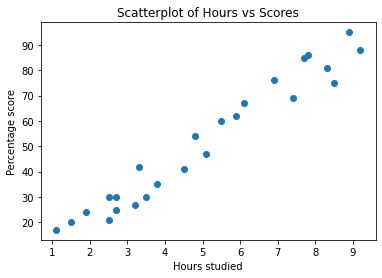

In [7]:
#Scatter Plot
x=dataset["Hours"]
y=dataset["Scores"]
plt.scatter(x,y)
plt.title("Scatterplot of Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")

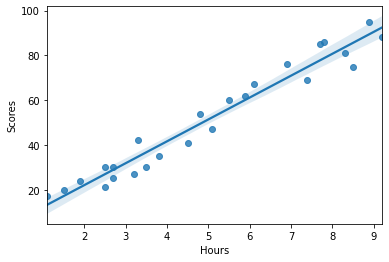

In [8]:
#Regression Plot
sns.regplot(x="Hours",y="Scores",data=dataset)
plt.show()


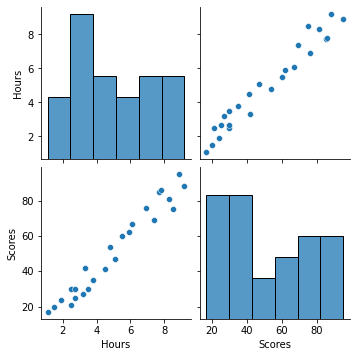

In [9]:
# pairplot
sns.pairplot(dataset)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


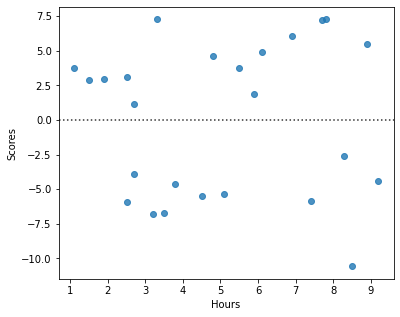

In [10]:
# residual plot
width = 6
height = 5
plt.figure(figsize = (width, height))
sns.residplot(x,y)
plt.show()

##5. DESCRIPTIVE DATA ANALYSIS##

Here, we will try to check the correlation between the two variables i.e Hours and Scores

In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# Correlation
corrmat=dataset.corr()
corrmat

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


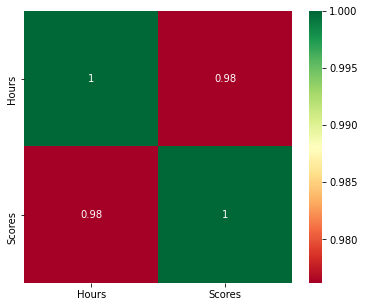

In [13]:
# plotting Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
plt.show()


In [14]:
# Checking for the values of Pearson coeffecient and p-value.
from scipy import stats
pearson_coef,p_value = stats.pearsonr(dataset["Hours"],dataset["Scores"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is 0.9761906560220884 with a p value of  9.132624467460325e-17


Pearson coeffecient is very near to 1 and p-value seems < 0.001 which shows that there is a strong positive correlation between Hours and scores.

##6. MODEL DEVELOPMENT##

Here, we will use Simple Linear Regression for prediction.

Simple Linear Regression (SLR):-
 
It takes two values:
1. The predictor variable - X (Hours)
2. The target variable - Y (Scores)

       
   Y=  mx+c
   
where-

m = model parameters

c = intercept

Y = Scores

X = Hours

       

In [15]:
# importing sklearn libraries.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [16]:
# this will create a numpy array of features
X= dataset["Hours"].values.reshape(-1,1) 
Y= dataset["Scores"].values.reshape(-1,1)

In [17]:
#Splitting the data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [18]:
# printing the shapes of train and test set
print("shape of X_train :",X_train.shape)
print("shape of Y_train :",Y_train.shape)
print("Shape of X_test :" ,X_test.shape)
print("Shape of Y_test :",Y_test.shape)

shape of X_train : (20, 1)
shape of Y_train : (20, 1)
Shape of X_test : (5, 1)
Shape of Y_test : (5, 1)


In [19]:
# Creating a model object
lm=LinearRegression()

In [20]:
# fitting a model
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm.intercept_

array([2.01816004])

In [22]:
lm.coef_

array([[9.91065648]])

##7. MAKING PREDICTIONS

In [23]:
# prediction using a model
Y_pred = lm.predict(X_test)

***To predict the score of a student on 9.25 hours.*** 

In [24]:
# prediction:
hrs =[[9.25]]
pred = lm.predict(hrs)
print("The predicted score of a student is {}".format(pred[0]))

The predicted score of a student is [93.69173249]


##8. MODEL EVALUATION 

To determine how accurate our model is, we will find out :

1. R-squared
2. Mean squared error(MSE)

1.R-squared - It is a measure to indicate how close the data is to the fitted line.

2.MSE - It measures the difference between actual value and the estimated value.

In [25]:
print("Mean squared error : ", mean_squared_error(Y_test,Y_pred))
print("R score : ", r2_score(Y_test,Y_pred))

Mean squared error :  21.598769307217456
R score :  0.9454906892105354


##9. CONCLUSION

Hence, the predicted score of a student using simple linear regression is 93.69173249